In [21]:
#Name - Bisistha Patra
#Student ID - 24159091

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#the new dataset is in tsv file format, and we need to combine the train and test dataset,
#make changes to the reviewID column name (currently - Unnamed:0) before proceeding to dataset analysis

train = pd.read_csv("/content/drugLibTrain_raw.tsv", sep = "\t")
test = pd.read_csv("/content/drugLibTest_raw.tsv", sep = "\t")

#combining the training and testing dataset
df = pd.concat([train, test], ignore_index=True)

#renamining the column Unnamed: 0 to reviewID
df.rename(columns={'Unnamed: 0': 'reviewID'}, inplace=True)

#dataset analysis
df.dtypes
df.info()
df.describe()

#finding the count of nan/missing values in the dataset
df.isna().sum()

#dropping nan/missing values based rows in the columns - "benefitsReview" and "sideEffectsReview", as these are the primary columns for the pathway task
df = df.dropna(subset=['benefitsReview', 'sideEffectsReview']).copy()
#ignored the 11 missing values in "commentsReview" column as it is not used -
#and we cannot drop another 11 rows which do contain the benefits and sideEffcets reviews

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4143 entries, 0 to 4142
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   reviewID           4143 non-null   int64 
 1   urlDrugName        4143 non-null   object
 2   rating             4143 non-null   int64 
 3   effectiveness      4143 non-null   object
 4   sideEffects        4143 non-null   object
 5   condition          4142 non-null   object
 6   benefitsReview     4120 non-null   object
 7   sideEffectsReview  4045 non-null   object
 8   commentsReview     4130 non-null   object
dtypes: int64(2), object(7)
memory usage: 291.4+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 4025 entries, 0 to 4142
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   reviewID           4025 non-null   int64 
 1   urlDrugName        4025 non-null   object
 2   rating             4025 non-nul

In [22]:
from wordcloud import WordCloud
import numpy as np

# Set style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

/tmp/ipython-input-516471817.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='rating', palette='plasma')


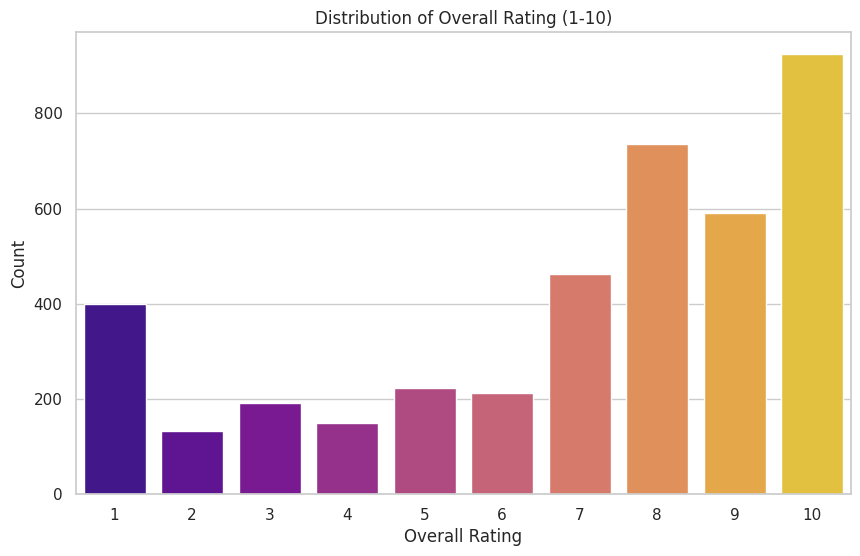

In [25]:
plt.figure()
sns.countplot(data=df, x='rating', palette='plasma')
plt.title('Distribution of Overall Rating (1-10)')
plt.xlabel('Overall Rating')
plt.ylabel('Count')
plt.savefig('overall_rating_dist.png')
plt.show()

/tmp/ipython-input-4256280590.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='effectiveness', order=[
/tmp/ipython-input-4256280590.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sideEffects', order=[


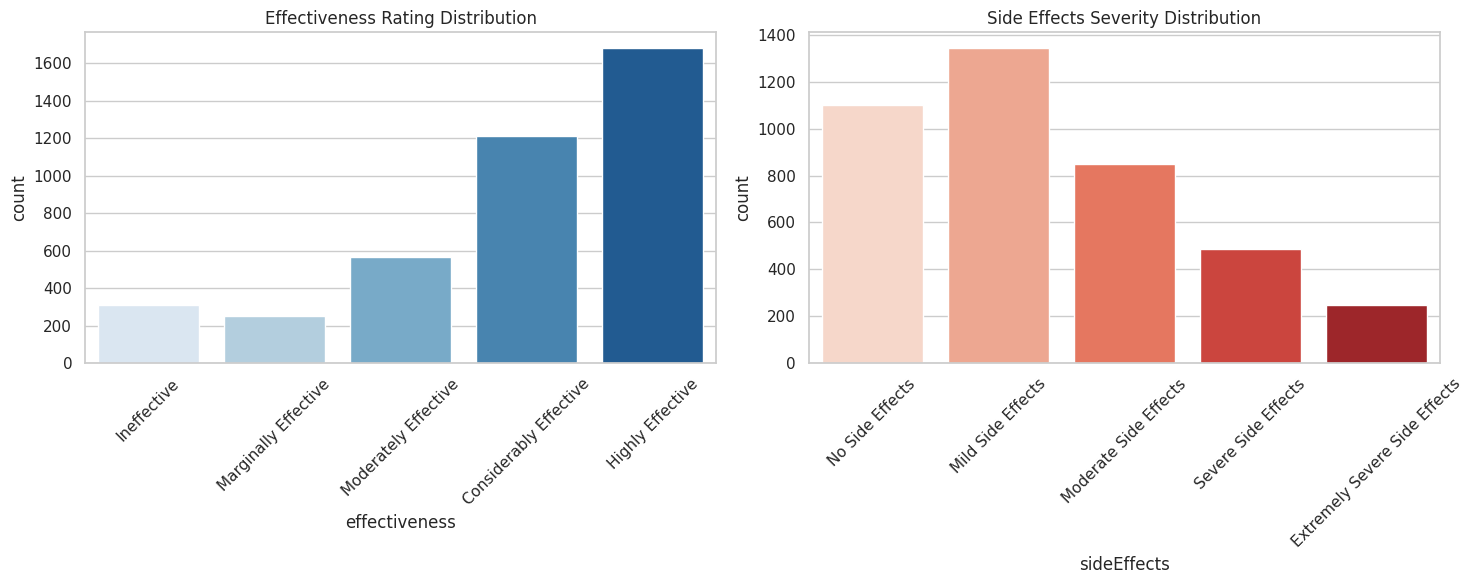

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.countplot(data=df, x='effectiveness', order=[
    'Ineffective', 'Marginally Effective', 'Moderately Effective',
    'Considerably Effective', 'Highly Effective'], ax=axes[0], palette='Blues')
axes[0].set_title('Effectiveness Rating Distribution')
axes[0].tick_params(axis='x', rotation=45)

sns.countplot(data=df, x='sideEffects', order=[
    'No Side Effects', 'Mild Side Effects', 'Moderate Side Effects',
    'Severe Side Effects', 'Extremely Severe Side Effects'], ax=axes[1], palette='Reds')
axes[1].set_title('Side Effects Severity Distribution')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('aspect_ratings_dist.png')
plt.show()

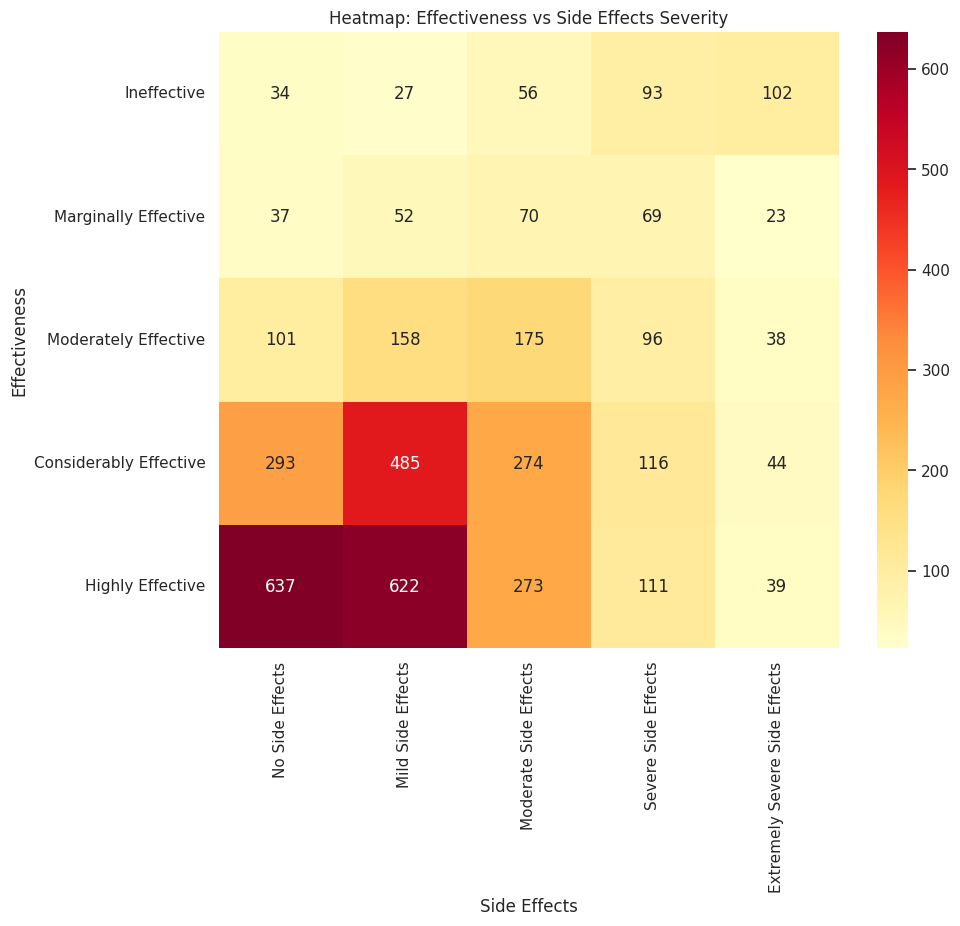

In [27]:
# Create ordered categories
eff_order = ['Ineffective', 'Marginally Effective', 'Moderately Effective',
             'Considerably Effective', 'Highly Effective']
se_order = ['No Side Effects', 'Mild Side Effects', 'Moderate Side Effects',
            'Severe Side Effects', 'Extremely Severe Side Effects']

crosstab = pd.crosstab(df['effectiveness'], df['sideEffects'])
crosstab = crosstab.loc[eff_order, se_order]

plt.figure(figsize=(10, 8))
sns.heatmap(crosstab, annot=True, fmt='d', cmap='YlOrRd')
plt.title('Heatmap: Effectiveness vs Side Effects Severity')
plt.ylabel('Effectiveness')
plt.xlabel('Side Effects')
plt.savefig('effectiveness_vs_sideeffects_heatmap.png')
plt.show()

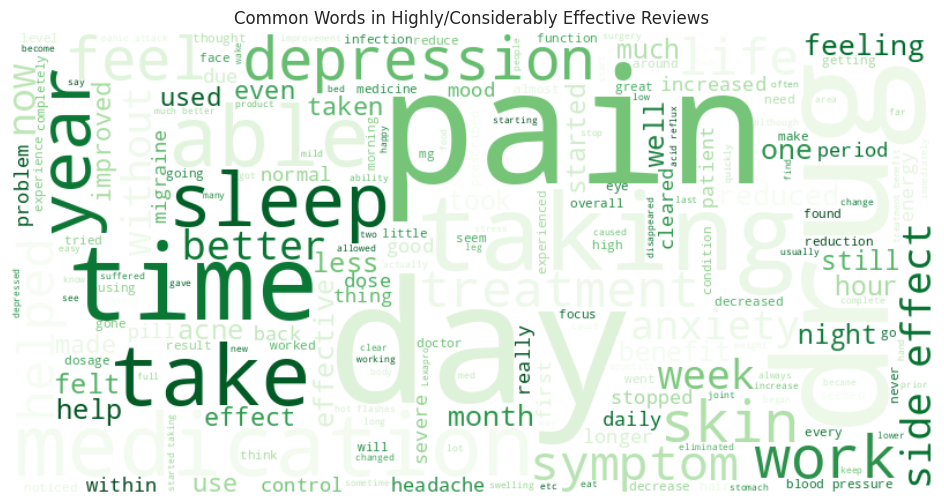

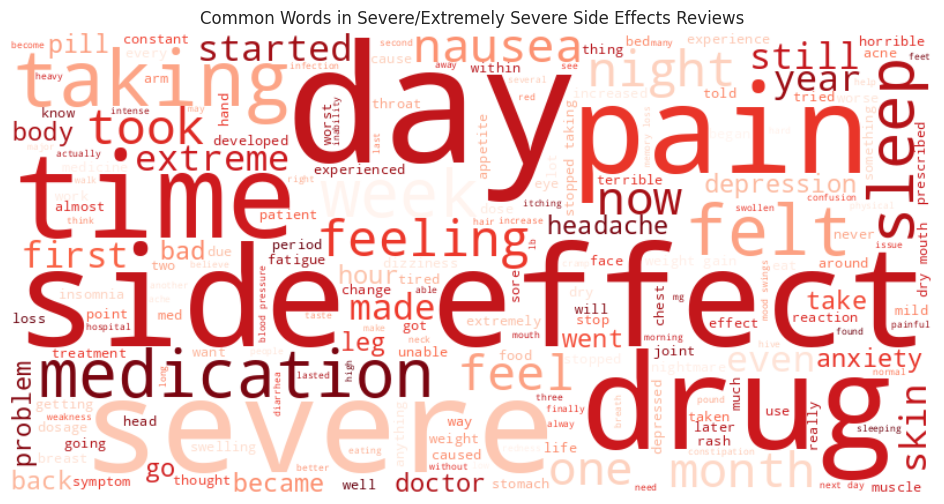

In [28]:
# Word cloud for benefitsReview (positive effectiveness words)
high_eff_text = ' '.join(df[df['effectiveness'].isin(['Highly Effective', 'Considerably Effective'])]['benefitsReview'])
wordcloud_eff = WordCloud(width=800, height=400, background_color='white', colormap='Greens').generate(high_eff_text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_eff, interpolation='bilinear')
plt.axis('off')
plt.title('Common Words in Highly/Considerably Effective Reviews')
plt.savefig('wordcloud_effectiveness_positive.png')
plt.show()

# Word cloud for severe side effects
severe_se_text = ' '.join(df[df['sideEffects'].isin(['Severe Side Effects', 'Extremely Severe Side Effects'])]['sideEffectsReview'])
wordcloud_se = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(severe_se_text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_se, interpolation='bilinear')
plt.axis('off')
plt.title('Common Words in Severe/Extremely Severe Side Effects Reviews')
plt.savefig('wordcloud_sideeffects_severe.png')
plt.show()

In [29]:
# Effectiveness: Positive if the drug clearly works well
eff_mapping = {
    'Highly Effective': 1,        # Positive
    'Considerably Effective': 1,  # Positive
    'Moderately Effective': 0,    # Negative/Neutral → often not strong enough
    'Marginally Effective': 0,
    'Ineffective': 0
}

# Side Effects: Positive if tolerable (mild or none)
se_mapping = {
    'No Side Effects': 1,         # Positive (good)
    'Mild Side Effects': 1,       # Positive (tolerable)
    'Moderate Side Effects': 0,   # Negative
    'Severe Side Effects': 0,
    'Extremely Severe Side Effects': 0
}

In [30]:
# Apply to your df (the 4025-row version with both aspects)
df['eff_label'] = df['effectiveness'].map(eff_mapping)
df['se_label'] = df['sideEffects'].map(se_mapping)

# Quick check
print(df['eff_label'].value_counts(normalize=True))
print(df['se_label'].value_counts(normalize=True))

# Conflict preview
conflicts = df[(df['eff_label'] == 1) & (df['se_label'] == 0)]
print(f"Potential conflict cases: {len(conflicts)} ({len(conflicts)/len(df)*100:.1f}%)")

eff_label
1    0.719006
0    0.280994
Name: proportion, dtype: float64
se_label
1    0.607702
0    0.392298
Name: proportion, dtype: float64
Potential conflict cases: 857 (21.3%)


In [32]:
import re
import html
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')
def preprocessing(text):
  text = html.unescape(text)
  #used to fix the html parts in the reviews like &#039

  text = text.strip('"') #removing quotes from the reviews

  #converting to lowercase
  text = text.lower()

  #removing numbers and special characters (keeping only letters)
  #numbers like 400mg and punctuations
  #also removes anything after the apostropes
  text = re.sub(r'[^a-z\s]', '', text)

  #splitting into words - tokenise the reviews
  tokens = nltk.word_tokenize(text)

  #removing stopwords, lemmatizing
  stop_words = set(stopwords.words('english'))
  lemm = WordNetLemmatizer()
  tokens = [word for word in tokens if word not in stop_words]
  tokens = [lemm.lemmatize(word) for word in tokens]

  #joining the reviews into one single string
  return " ".join(tokens)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [33]:
df['clean_benefits'] = df['benefitsReview'].apply(preprocessing)
df['clean_sideeffects'] = df['sideEffectsReview'].apply(preprocessing)

# Effectiveness classifier
X_eff = df['clean_benefits']
y_eff = df['eff_label']

# Side Effects classifier
X_se = df['clean_sideeffects']
y_se = df['se_label']

In [34]:
from sklearn.model_selection import train_test_split

# Effectiveness
X_eff_train, X_eff_test, y_eff_train, y_eff_test = train_test_split(
    X_eff, y_eff, test_size=0.2, random_state=42, stratify=y_eff
)

# Side Effects
X_se_train, X_se_test, y_se_train, y_se_test = train_test_split(
    X_se, y_se, test_size=0.2, random_state=42, stratify=y_se
)

In [35]:
from sklearn.feature_extraction.text import CountVectorizer

# Fit on training data only
vectorizer_eff = CountVectorizer(max_features=5000)
X_eff_train_counts = vectorizer_eff.fit_transform(X_eff_train)
X_eff_test_counts = vectorizer_eff.transform(X_eff_test)

vectorizer_se = CountVectorizer(max_features=5000)
X_se_train_counts = vectorizer_se.fit_transform(X_se_train)
X_se_test_counts = vectorizer_se.transform(X_se_test)

# Convert to arrays (your NB class expects this)
X_eff_train_arr = X_eff_train_counts.toarray()
X_eff_test_arr = X_eff_test_counts.toarray()
X_se_train_arr = X_se_train_counts.toarray()
X_se_test_arr = X_se_test_counts.toarray()

In [36]:
# Assuming your NaiveBayesScratch class is already defined from Part 1
#from sctrach implementation of the model
class NaiveBayesScratch:
    def __init__(self, alpha=1.0):
        self.alpha = alpha  # Smoothing parameter

    def fit(self, X, y):
      #matching sizes and finding unique classes
        n_samples, n_features = X.shape
        self.classes = np.unique(y)
        n_classes = len(self.classes)

        #initialising priors and likelihoods
        self.priors = np.zeros(n_classes)
        self.likelihoods = np.zeros((n_classes, n_features))

        for idx, c in enumerate(self.classes):
            #selecting only those rows for the current class
            X_c = X[y == c]

            #there are three main steps for the from scratch implementation -
            # 1. Prior Calculation: P(Class)
            self.priors[idx] = X_c.shape[0] / n_samples

            # 2. Laplacian Smoothing for Likelihoods: P(Word | Class)
            # Formula: (Count of Word in Class + Alpha) / (Total Words in Class + Alpha * Vocab Size)
            total_count_words_in_class = np.sum(X_c)
            word_counts_in_class = np.sum(X_c, axis=0)

            self.likelihoods[idx, :] = (word_counts_in_class + self.alpha) / \
                                       (total_count_words_in_class + self.alpha * n_features)

    def predict(self, X):
        # 3. Log-likelihood calculation to prevent underflow
        # Log(P(Class|Words)) = Log(P(Class)) + Sum(Word_Count * Log(P(Word|Class)))
        log_priors = np.log(self.priors)
        log_likelihoods = np.log(self.likelihoods)

        #calculating scores for all test samples
        #for speeding the process, used matrix multiplicatiom
        scores = X @ log_likelihoods.T + log_priors

        #could also be done as calculating the total wieght of each words in a class and
        #adding that to the staring probability of the class
        return self.classes[np.argmax(scores, axis=1)]

# Effectiveness model
nb_eff = NaiveBayesScratch(alpha=1.0)
print("Training Effectiveness Naive Bayes...")
nb_eff.fit(X_eff_train_arr, y_eff_train.values)

# Side Effects model
nb_se = NaiveBayesScratch(alpha=1.0)
print("Training Side Effects Naive Bayes...")
nb_se.fit(X_se_train_arr, y_se_train.values)

Training Effectiveness Naive Bayes...
Training Side Effects Naive Bayes...



=== Effectiveness Sentiment ===
Accuracy: 0.7677
F1-Score: 0.8519
              precision    recall  f1-score   support

    Negative       0.66      0.35      0.46       226
    Positive       0.79      0.93      0.85       579

    accuracy                           0.77       805
   macro avg       0.72      0.64      0.66       805
weighted avg       0.75      0.77      0.74       805



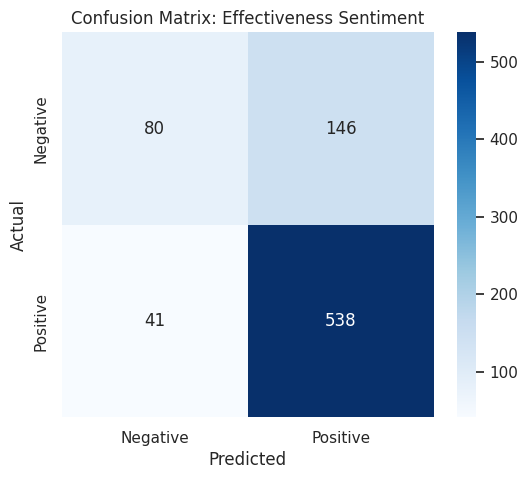


=== Side Effects Sentiment ===
Accuracy: 0.7901
F1-Score: 0.8315
              precision    recall  f1-score   support

    Negative       0.75      0.69      0.72       316
    Positive       0.81      0.85      0.83       489

    accuracy                           0.79       805
   macro avg       0.78      0.77      0.78       805
weighted avg       0.79      0.79      0.79       805



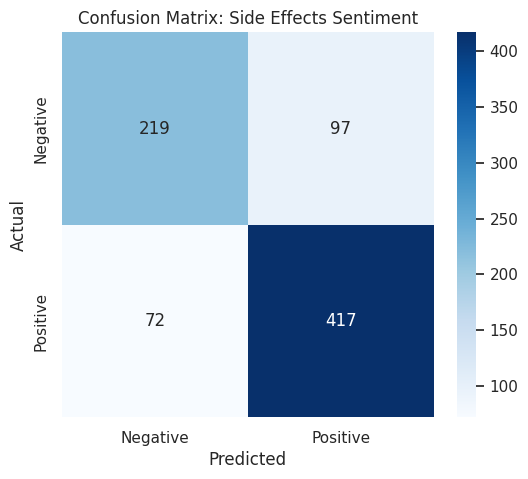

In [37]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

def evaluate_model(y_true, y_pred, title):
    print(f"\n=== {title} ===")
    print("Accuracy:", round(accuracy_score(y_true, y_pred), 4))
    print("F1-Score:", round(f1_score(y_true, y_pred), 4))
    print(classification_report(y_true, y_pred, target_names=['Negative', 'Positive']))

    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Negative', 'Positive'],
                yticklabels=['Negative', 'Positive'])
    plt.title(f'Confusion Matrix: {title}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.savefig(f'cm_{title.lower().replace(" ", "_")}.png')
    plt.show()

# Effectiveness evaluation
y_eff_pred = nb_eff.predict(X_eff_test_arr)
evaluate_model(y_eff_test, y_eff_pred, "Effectiveness Sentiment")

# Side Effects evaluation
y_se_pred = nb_se.predict(X_se_test_arr)
evaluate_model(y_se_test, y_se_pred, "Side Effects Sentiment")

In [38]:
# Combine predictions on the test set (same indices due to same random_state)
test_predictions = pd.DataFrame({
    'actual_eff': y_eff_test.values,
    'pred_eff': y_eff_pred,
    'actual_se': y_se_test.values,
    'pred_se': y_se_pred,
    'review_benefits': X_eff_test.values,
    'review_sideeffects': X_se_test.values
})

# Detect "Silent Risk" cases: Predicted Positive Effectiveness + Predicted Negative Side Effects
high_risk = test_predictions[
    (test_predictions['pred_eff'] == 1) &
    (test_predictions['pred_se'] == 0)
]

print(f"\nHIGH-RISK 'SILENT' CASES DETECTED: {len(high_risk)} out of {len(test_predictions)} test reviews")
print(f"Percentage: {len(high_risk)/len(test_predictions)*100:.1f}%")

# Show a few examples
print("\nExample High-Risk Reviews:")
for idx, row in high_risk.head(3).iterrows():
    print(f"\n--- Review {idx} ---")
    print("Benefits Review:", row['review_benefits'][:300], "...")
    print("Side Effects Review:", row['review_sideeffects'][:300], "...")


HIGH-RISK 'SILENT' CASES DETECTED: 254 out of 805 test reviews
Percentage: 31.6%

Example High-Risk Reviews:

--- Review 5 ---
Benefits Review: effectively reduced blood pressure good level amitianed year taking ...
Side Effects Review: massive headache hour ingesting pill well heavy clogged sinus found hard breath felt like flu symptom ...

--- Review 6 ---
Benefits Review: issue rejection patient diagonosed jc virus side effect cellcept blood test must taken weekly check fine line much little prograf system patient jc virus blood test would less frequent ...
Side Effects Review: severe headache body ache joint pain spent foggy day feeling like worst case flu ever sleep urinate day end constipated didnt go four day stomach hurt less gall bladder surgery drug never take macrobid dont know responsible pharmaceutical company manufacture drug know produce worse problem cure ...

--- Review 9 ---
Benefits Review: fell asleep within min taking drug sound sleep night long hangover effect ne

In [39]:
# First, get predictions on the entire dataset (or just test set)
# Assuming you already have trained nb_eff and nb_se

# Vectorize full data
X_eff_full_counts = vectorizer_eff.transform(df['clean_benefits'])
X_se_full_counts = vectorizer_se.transform(df['clean_sideeffects'])
X_eff_full_arr = X_eff_full_counts.toarray()
X_se_full_arr = X_se_full_counts.toarray()

# Predict on full data
df['pred_eff'] = nb_eff.predict(X_eff_full_arr)
df['pred_se'] = nb_se.predict(X_se_full_arr)   # Note: 1 = Positive (mild/no SE), 0 = Negative (moderate+ SE)

# Create quadrant column
def assign_quadrant(row):
    eff = row['pred_eff']
    se = row['pred_se']
    if eff == 1 and se == 1:
        return "Success\n(High Eff / Low SE)"
    elif eff == 1 and se == 0:
        return "Risky\n(High Eff / High SE)"
    elif eff == 0 and se == 1:
        return "Placebo-like\n(Low Eff / Low SE)"
    else:  # eff == 0 and se == 0
        return "Failure\n(Low Eff / High SE)"

df['quadrant'] = df.apply(assign_quadrant, axis=1)

# Counts
quadrant_counts = df['quadrant'].value_counts()
print(quadrant_counts)

# Percentage
print("\nQuadrant Distribution (%):")
print((quadrant_counts / len(df) * 100).round(1))

quadrant
Success\n(High Eff / Low SE)        2169
Risky\n(High Eff / High SE)         1065
Failure\n(Low Eff / High SE)         418
Placebo-like\n(Low Eff / Low SE)     373
Name: count, dtype: int64

Quadrant Distribution (%):
quadrant
Success\n(High Eff / Low SE)        53.9
Risky\n(High Eff / High SE)         26.5
Failure\n(Low Eff / High SE)        10.4
Placebo-like\n(Low Eff / Low SE)     9.3
Name: count, dtype: float64


/tmp/ipython-input-1812396033.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='quadrant', order=order, palette='viridis')


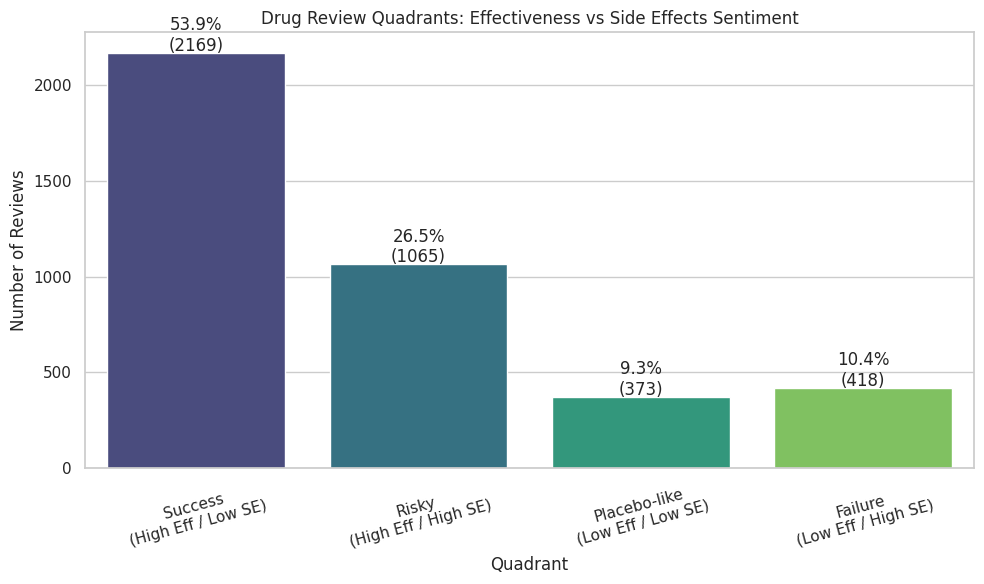

In [40]:
# Order for nice plotting
order = ["Success\n(High Eff / Low SE)", "Risky\n(High Eff / High SE)",
         "Placebo-like\n(Low Eff / Low SE)", "Failure\n(Low Eff / High SE)"]

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='quadrant', order=order, palette='viridis')
plt.title('Drug Review Quadrants: Effectiveness vs Side Effects Sentiment')
plt.ylabel('Number of Reviews')
plt.xlabel('Quadrant')
plt.xticks(rotation=15)

# Add percentage labels
total = len(df)
for i, p in enumerate(plt.gca().patches):
    height = p.get_height()
    plt.text(p.get_x() + p.get_width()/2., height + 10,
             f'{height/total*100:.1f}%\n({int(height)})',
             ha='center', fontsize=12)

plt.tight_layout()
plt.savefig('drug_review_quadrants.png')
plt.show()

In [42]:
# Add quadrant-specific top words by filtering df
def top_words_per_quadrant(quadrant_name, text_column, vectorizer, nb_model, top_n=10):
    subset = df[df['quadrant'] == quadrant_name]
    if len(subset) == 0:
        return []

    # Transform subset text
    X_subset = vectorizer.transform(subset[text_column])
    X_subset_arr = X_subset.toarray()

    # Predicted class counts in this quadrant
    preds = nb_model.predict(X_subset_arr)
    class_counts = np.bincount(preds, minlength=2)

    # Use likelihoods weighted by actual occurrence in quadrant
    feature_names = np.array(vectorizer.get_feature_names_out())
    word_freq_in_quad = np.sum(X_subset_arr, axis=0)

    # Score = frequency in quadrant * log prob difference from other class
    scores_pos = word_freq_in_quad * (nb_model.likelihoods[1] - nb_model.likelihoods[0])
    scores_neg = word_freq_in_quad * (nb_model.likelihoods[0] - nb_model.likelihoods[1])

    top_pos = feature_names[np.argsort(scores_pos)[-top_n:][::-1]]
    top_neg = feature_names[np.argsort(scores_neg)[-top_n:][::-1]]

    return list(top_pos), list(top_neg)

# Example for Risky quadrant
risky_pos, risky_neg = top_words_per_quadrant("Risky\n(High Eff / High SE)",
                                             'clean_benefits', vectorizer_eff, nb_eff)
print("\nIn RISKY quadrant - words driving Positive Effectiveness:", risky_pos)
print("Words driving Negative Side Effects (from SE model on same reviews):")
risky_se_pos, risky_se_neg = top_words_per_quadrant("Risky\n(High Eff / High SE)",
                                                    'clean_sideeffects', vectorizer_se, nb_se)
print(risky_se_neg)  # Most negative/discriminative for severe SE


In RISKY quadrant - words driving Positive Effectiveness: ['day', 'also', 'year', 'able', 'life', 'taking', 'time', 'sleep', 'feel', 'much']
Words driving Negative Side Effects (from SE model on same reviews):
['severe', 'pain', 'day', 'like', 'month', 'loss', 'feeling', 'extreme', 'started', 'depression']


In [43]:
def get_top_discriminative_words(nb_model, vectorizer, top_n=15):
    feature_names = np.array(vectorizer.get_feature_names_out())
    log_probs = nb_model.likelihoods  # shape: (n_classes, n_features)

    # Compute log probability ratio: Positive (1) vs Negative (0)
    log_ratio = log_probs[1] - log_probs[0]  # Positive if >0, Negative if <0

    # Top words strongly associated with Positive Effectiveness/Side Effects
    top_positive = feature_names[np.argsort(log_ratio)[-top_n:][::-1]]

    # Top words strongly associated with Negative
    top_negative = feature_names[np.argsort(-log_ratio)[-top_n:][::-1]]  # flip for negative

    return list(top_positive), list(top_negative)

# Apply to both models
top_eff_pos, top_eff_neg = get_top_discriminative_words(nb_eff, vectorizer_eff)
top_se_pos, top_se_neg = get_top_discriminative_words(nb_se, vectorizer_se)

print("Words strongly indicating POSITIVE Effectiveness:")
print(top_eff_pos)
print("\nWords strongly indicating NEGATIVE Effectiveness:")
print(top_eff_neg)

print("\nWords strongly indicating TOLERABLE Side Effects (positive):")
print(top_se_pos)
print("\nWords strongly indicating SEVERE Side Effects (negative):")
print(top_se_neg)

Words strongly indicating POSITIVE Effectiveness:
['day', 'year', 'life', 'also', 'within', 'able', 'taking', 'time', 'sleep', 'feel', 'anxiety', 'feeling', 'much', 'week', 'without']

Words strongly indicating NEGATIVE Effectiveness:
['benefit', 'none', 'treatment', 'see', 'help', 'however', 'side', 'effect', 'spot', 'seemed', 'increase', 'worse', 'bone', 'slight', 'seem']

Words strongly indicating TOLERABLE Side Effects (positive):
['effect', 'side', 'none', 'mild', 'take', 'slight', 'little', 'medication', 'noticed', 'first', 'experienced', 'however', 'experience', 'bit', 'sometimes']

Words strongly indicating SEVERE Side Effects (negative):
['severe', 'pain', 'extreme', 'like', 'day', 'depression', 'month', 'stopped', 'feeling', 'still', 'started', 'loss', 'made', 'anxiety', 'horrible']


In [45]:
# Filter Risky reviews
risky_df = df[df['quadrant'] == "Risky\n(High Eff / High SE)"]

# Show actual frequent meaningful words in Risky reviews (after stopword removal, these should be content words)
from collections import Counter
all_benefits_words = ' '.join(risky_df['clean_benefits']).split()
all_se_words = ' '.join(risky_df['clean_sideeffects']).split()

print("\nMost common words in Risky quadrant - Benefits text:")
print([word for word, count in Counter(all_benefits_words).most_common(20)])

print("\nMost common words in Risky quadrant - Side Effects text:")
print([word for word, count in Counter(all_se_words).most_common(20)])


Most common words in Risky quadrant - Benefits text:
['day', 'pain', 'drug', 'time', 'taking', 'sleep', 'depression', 'able', 'effect', 'also', 'felt', 'better', 'medication', 'get', 'would', 'less', 'helped', 'like', 'year', 'feel']

Most common words in Risky quadrant - Side Effects text:
['day', 'taking', 'effect', 'side', 'time', 'also', 'pain', 'severe', 'would', 'drug', 'like', 'weight', 'month', 'week', 'loss', 'feeling', 'medication', 'first', 'skin', 'get']


In [46]:
# Domain-specific medical noise words (identified from initial analysis)
medical_noise = {
    'day', 'taking', 'drug', 'medication', 'time', 'also', 'get',
    'side', 'effect', 'would', 'felt', 'like', 'month', 'week',
    'year', 'first', 'started', 'take', 'took', 'daily'
}

# Re-compute most common words in Risky quadrant after filtering
risky_df = df[df['quadrant'] == "Risky\n(High Eff / High SE)"]

# Benefits review (effectiveness) - filtered
benefits_words = ' '.join(risky_df['clean_benefits']).split()
filtered_benefits = [word for word in benefits_words if word not in medical_noise]
benefits_top = Counter(filtered_benefits).most_common(20)

# Side effects review - filtered
se_words = ' '.join(risky_df['clean_sideeffects']).split()
filtered_se = [word for word in se_words if word not in medical_noise]
se_top = Counter(filtered_se).most_common(20)

print("Risky Quadrant - Key Terms in Benefits Review (after noise removal):")
print([word for word, count in benefits_top])

print("\nRisky Quadrant - Key Terms in Side Effects Review (after noise removal):")
print([word for word, count in se_top])

Risky Quadrant - Key Terms in Benefits Review (after noise removal):
['pain', 'sleep', 'depression', 'able', 'better', 'less', 'helped', 'feel', 'skin', 'much', 'acne', 'anxiety', 'benefit', 'reduced', 'life', 'treatment', 'night', 'work', 'cleared', 'hour']

Risky Quadrant - Key Terms in Side Effects Review (after noise removal):
['pain', 'severe', 'weight', 'loss', 'feeling', 'skin', 'feel', 'dry', 'night', 'could', 'gain', 'sleep', 'back', 'nausea', 'made', 'still', 'hour', 'one', 'problem', 'depression']


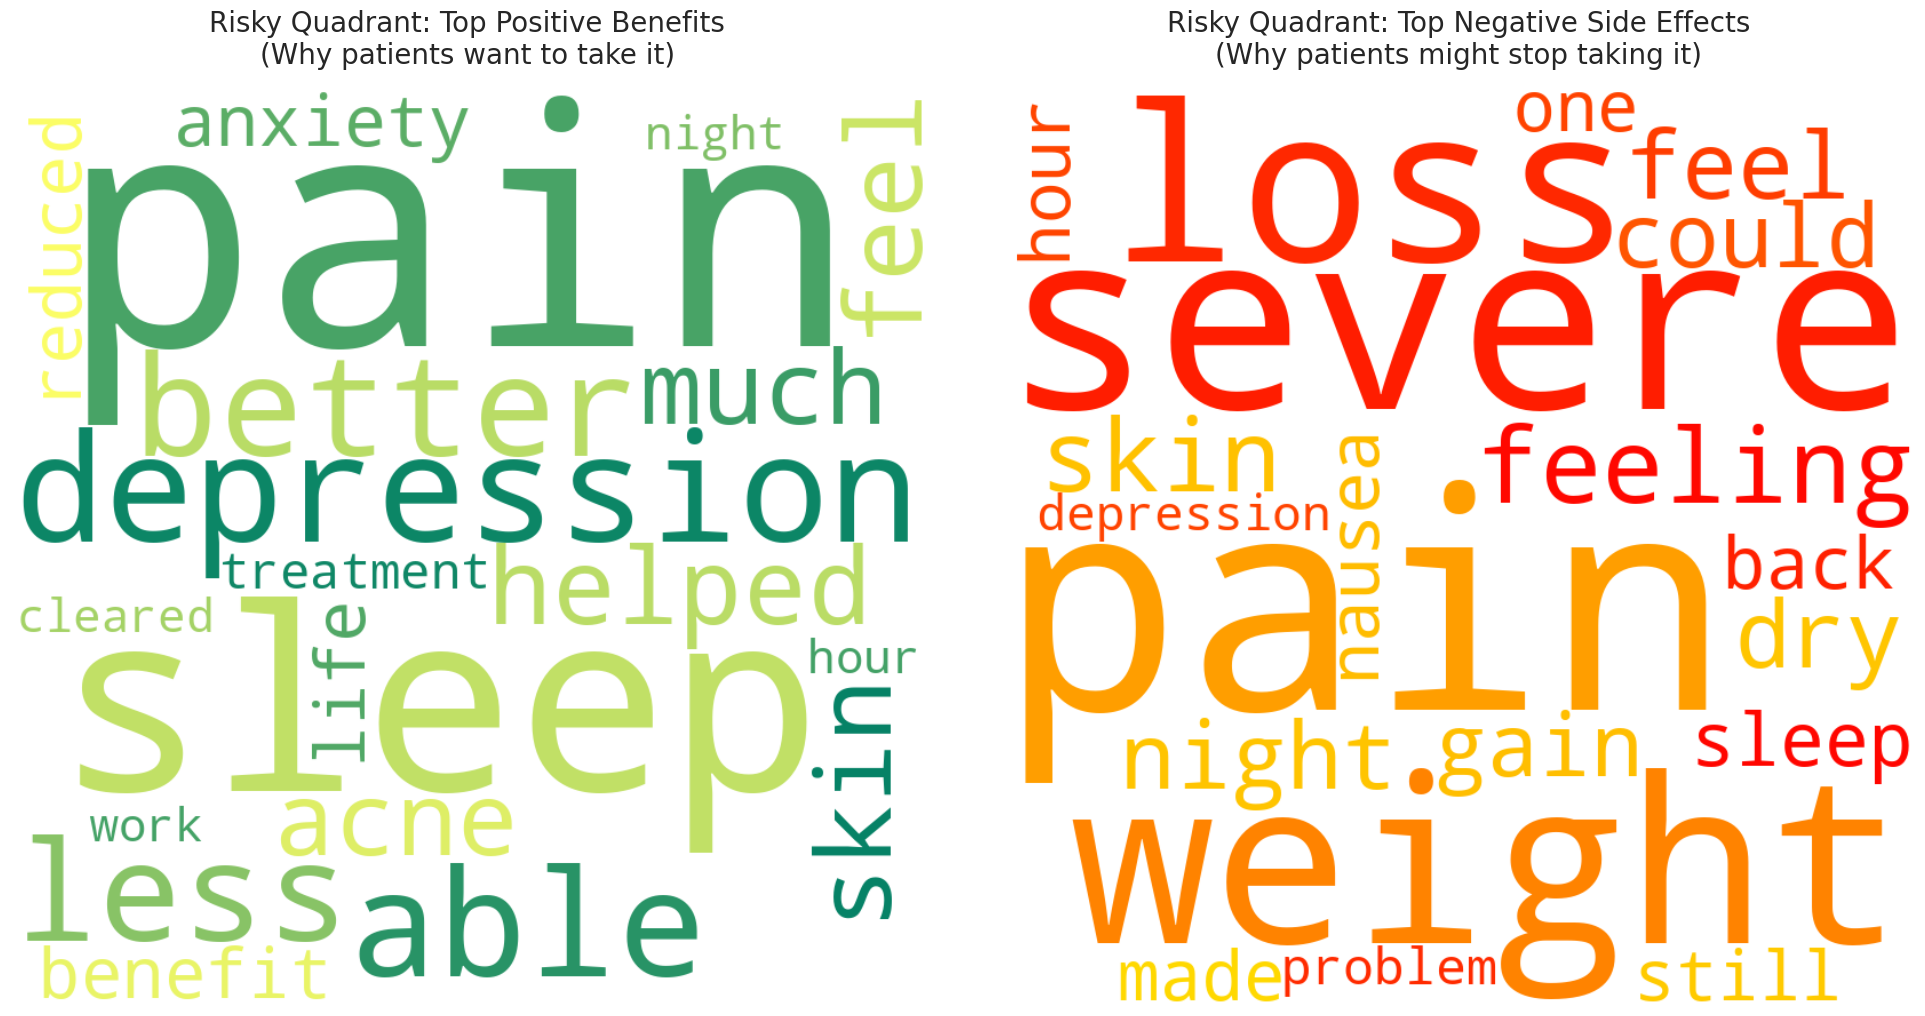

In [47]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 1. Convert your frequency lists back into dictionaries for the WordCloud generator
benefits_dict = dict(benefits_top)
se_dict = dict(se_top)

# 2. Create the figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# 3. Generate Benefits Word Cloud (Green/Summer tones for positive outcomes)
wc_benefits = WordCloud(
    width=800,
    height=800,
    background_color='white',
    colormap='summer',  # Greenish tones
    max_words=20
).generate_from_frequencies(benefits_dict)

ax1.imshow(wc_benefits, interpolation='bilinear')
ax1.set_title('Risky Quadrant: Top Positive Benefits\n(Why patients want to take it)', fontsize=20, pad=20)
ax1.axis('off')

# 4. Generate Side Effects Word Cloud (Red/Autumn tones for negative risks)
wc_se = WordCloud(
    width=800,
    height=800,
    background_color='white',
    colormap='autumn',  # Red/Orange/Yellow tones
    max_words=20
).generate_from_frequencies(se_dict)

ax2.imshow(wc_se, interpolation='bilinear')
ax2.set_title('Risky Quadrant: Top Negative Side Effects\n(Why patients might stop taking it)', fontsize=20, pad=20)
ax2.axis('off')

plt.tight_layout()
plt.savefig('risky_quadrant_wordclouds.png')
plt.show()